# 💪 Sports Center 고객 정보 분석 - 1
## I. 고객 데이터를 파악하라!

## ✔ 문제 상황 
### VOC (Voice of Customer)
- 운영하는 스포츠센터 트레이닝 붐 때문에 지금까지 고객 수가 늘음
- 그러나, 최근 1년간 고객 수가 늘지 않는거 같음
- 자주 이용하는 고객만 계속 오는 느낌.
- 회원 데이터를 분석한 적이 없어 어떤 고객이 계속 이용하고 있는지 조차 모름.
- 데이터 분석을 하면 뭔가 알 수 있을까?

### 전제조건
- 스포츠 센터는 언제든 이용 할 수 있는 종일 회원, 낮에만 사용 할 수 있는 주간 회원, 밤에만 사용 할 수 있는 야간 회원
- 비정기적 입회비 할인, 반액, 무료 행사, 신규 회원을 유치
- 탈퇴 월말까지 신청 그 다음 달 말에 탈퇴됌

### 사용 할 데이터
- use_log.csv : 센터 이용 이력 2018년 4월 부터 2019년 3월까지 1년 분
- class_master.csv : 회원 구분 (종일, 주간, 야간)
- campaign_master.csv : 행사 종류 데이터 (입회비 유무)
- customer_master.csv : 2019년 3월 말 시점 회원 데이터

## ✔ Solution

## STEP1. 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
uselog = pd.read_csv('./use_log.csv')
uselog.shape

(197428, 3)

In [3]:
uselog.head(3)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01


In [4]:
customer = pd.read_csv('./customer_master.csv')
customer.shape

(4192, 8)

In [5]:
customer.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


In [6]:
class_master = pd.read_csv('./class_master.csv')
class_master.shape

(3, 3)

In [7]:
class_master

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [8]:
campaign_master = pd.read_csv('./campaign_master.csv')
campaign_master.shape

(3, 2)

In [9]:
campaign_master

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


## STEP2. 고객 데이터 가공

In [10]:
customer_join = pd.merge(customer, class_master, on='class', how='left')

In [11]:
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')

In [12]:
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [13]:
customer_join.shape

(4192, 11)

In [14]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


In [15]:
customer_join.isnull().sum() / len(customer_join)

customer_id      0.000000
name             0.000000
class            0.000000
gender           0.000000
start_date       0.000000
end_date         0.677958
campaign_id      0.000000
is_deleted       0.000000
class_name       0.000000
price            0.000000
campaign_name    0.000000
dtype: float64

In [16]:
customer_join.isna().sum() / len(customer_join)

customer_id      0.000000
name             0.000000
class            0.000000
gender           0.000000
start_date       0.000000
end_date         0.677958
campaign_id      0.000000
is_deleted       0.000000
class_name       0.000000
price            0.000000
campaign_name    0.000000
dtype: float64

## STEP3. EDA 및 데이터 기초 통계 분석

### 3-1) 고객 데이터 집계

In [17]:
customer_join.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [18]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [19]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [20]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [22]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] >= pd.to_datetime('20180401')]

In [23]:
print(len(customer_start))

1361


### 3-2) 최근 고객 데이터

In [24]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) |
                                  (customer_join['end_date'].isna())]

In [25]:
print(len(customer_newer))

2953


In [26]:
customer_newer['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [27]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [28]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

### STEP5. 이용 이력 데이터 집계
- 월 이용 횟수
- 평균 이용 횟수
- 중앙 이용 횟수
- 최소, 최대 이용 횟수

In [29]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [30]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])

In [31]:
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')

In [32]:
uselog.head(3)

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804


In [33]:
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index=False).count()
uselog_months.head(3)

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3


In [34]:
uselog_months.rename(columns={'log_id' : 'count'}, inplace=True)

In [35]:
del uselog_months['usedate']

In [36]:
uselog_months.head(3)

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3


In [37]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer.head(3)

,mean,median,max,min
customer_id,,,,
AS002855,4.5,5.0,7,2
AS008805,4.0,4.0,8,1
AS009013,2.0,2.0,2,2


In [38]:
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head(3)

,customer_id,mean,median,max,min
0,AS002855,4.5,5.0,7,2
1,AS008805,4.0,4.0,8,1
2,AS009013,2.0,2.0,2,2


### 3-3) 이용 이력 데이터로부터 정기 이용 여부 컬럼 
- 매주 같은 요일에 오는 고객
- 최대값 4이상인 요일이 있으면 1처리
- 고객마다 월/요일별로 집계

In [39]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog.head(3)

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6


In [41]:
uselog_weekday = uselog.groupby(['customer_id', '연월', 'weekday'], as_index=False).count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.head(3)

,customer_id,연월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4


In [42]:
uselog_weekday.rename(columns={'log_id' : 'count'}, inplace=True)
uselog_weekday.head(3)

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4


In [43]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4, 1)
uselog_weekday.head(3)

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0


## STEP4. 고객 데이터와 이용 이력 데이터 결합

In [44]:
customer_join = pd.merge(customer_join, uselog_customer, on ='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on = 'customer_id', how='left')
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1


In [45]:
customer_join.isnull().sum() / len(customer_join)

customer_id      0.000000
name             0.000000
class            0.000000
gender           0.000000
start_date       0.000000
end_date         0.677958
campaign_id      0.000000
is_deleted       0.000000
class_name       0.000000
price            0.000000
campaign_name    0.000000
mean             0.000000
median           0.000000
max              0.000000
min              0.000000
routine_flg      0.000000
dtype: float64

In [46]:
customer_join.shape

(4192, 16)

## STEP5. 회원 기간을 계산
- 기간 : end_date - start_date
- 탈퇴하지않은 회원은 end_date 결측 값이기 때문에 값 수정이 필요함.

In [47]:
!conda list python-dateutil

# packages in environment at C:\Users\admin\anaconda3:
#
# Name                    Version                   Build  Channel


In [48]:
!conda install -c anaconda python-dateutil -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - python-dateutil


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                               4.10.1-py38haa95532_1 --> 4.10.3-py38haa95532_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    | ##5        |  26% 
conda-4.10.3         | 2.9 MB    | #########7 |  97% 
conda-4.10.3         | 2.9 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [50]:
!conda list python-dateutil

# packages in environment at C:\Users\admin\anaconda3:
#
# Name                    Version                   Build  Channel
python-dateutil           2.8.1              pyhd3eb1b0_0  


In [51]:
from dateutil.relativedelta import relativedelta

In [52]:
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30


In [55]:
customer_join['calc_date'].iloc[0], customer_join['start_date'].iloc[0]

(Timestamp('2019-04-30 00:00:00'), Timestamp('2015-05-01 00:00:00'))

In [53]:
delta = relativedelta(customer_join['calc_date'].iloc[0], customer_join['start_date'].iloc[0])

In [58]:
delta.years, delta.months

(3, 11)

In [59]:
delta.years*12+delta.months

47

In [60]:
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12+delta.months

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
customer_join.tail(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.0,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.0,11.0,11,11,0,2019-04-30,1
4191,IK692635,XXXXX,C02,F,2019-03-15,NaT,CA1,0,1_주간,7500,2_일반,10.0,10.0,10,10,0,2019-04-30,1


## STEP6. 고객 행동의 각종 통계량 파악

In [63]:
customer_join[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [64]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

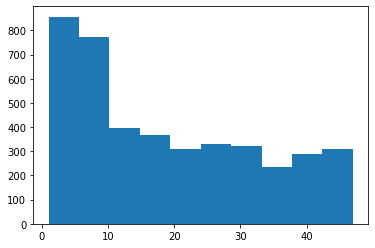

In [66]:
plt.hist(customer_join['membership_period'])

## STEP7. 탈퇴회원과 지속회원의 차이 파악
- 고객의 매월 평균 이용 횟수

In [67]:
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [68]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [69]:
customer_join.to_csv('customer_join.csv', index=False)